# Proyecto Final
##Juan Nicolás García
##Olger Mercado
###Materia: Métodos Computacionales


El siguiente notebook tiene como objetivo modelar el movimiento de un solido rigido el cual rebota y rota al mismo tiempo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Primera mente se deducen las fórmulas las cuales van a ser usadas para el programa. Suponemos inicialmente que nuestra pelota tiene una velocidad angular $\omega_1$,una velocidad $V_{0x}$,radio $R$ y masa $m$.Las colisiones dadas son completamente elasticas, entonces por conservacion del momentum angular del punto que choca con el suelo tenemos que:

$$-m V_{0x} R + I \omega_0 = - m V_{1x} R + I \omega_1 \\
 -V_{0x} + \gamma R \omega_0 = - V_{1x} + \gamma R \omega_1\\
 V_{1x} - V_{0x} = -\gamma R ( \omega_0 - \omega_1)
$$

Tambien por conservación de la energía tenemos lo siguiente relación:

$$\frac{1}{2} m V_{0x}^{2} + \frac{1}{2} m V_{0y}^{2} + I  \omega_0^{2} = \frac{1}{2} m V_{1x}^{2} + \frac{1}{2} m V_{1y}^{2} + I  \omega_1^{2}\\
V_{0x}^{2} + \gamma R^{2} \omega_0^{2} = V_{1x}^{2} + \gamma R^{2} \omega_0^{2}\\ ( V_{1x} - V_{0x} ) ( V_{1x} + V_{0x}) = \gamma R^{2} (\omega_0 - \omega_1) (\omega_0 + \omega_1)\\
V_{1x} + V_{0x} = -(\omega_0 + \omega_1)R
$$

Ahora suponiendo que la colisión es inelástica sabemos que $V_{0y}=-V_{1y}$ ya no se cumple sino que $V_{0y}= -\epsilon V_{1y}$ donde \epsilon está entre $0 \leqslant \epsilon \leqslant 1$. Tambien introducimos un coeficiente de restitucióntranservasal  $\beta$  el cual puede oscilar entre $-1 \leqslant \beta \leqslant 1$, este representa de forma simplificada el deslizamiento del punto de contacto de la pelota con el piso. Como las fuerzas que actúan sobre la bola son la fuerza normal $N$ y la fuerza de rozamiento $F_{r}$ y ambas pasan por el punto de contacto O, el momento angular respecto de este punto se conserva. Por tanto, las ecuaciones que describen el choque inelástico de una pelota con el suelo son:

$$
V_{0y}= -\epsilon V_{1y}\\
V_{1x} + \omega_1 R = - \beta (V_{0x}+\omega_0 R)\\
V_{1x} - V_{0x} = -\gamma R (\omega_0 - omega_1)
$$

Apartir de las formulas anteriores podemos hallar $V_{1x}$ y $ R \omega_1$ en terminos de los valores iniciales del problema y quedarían de las siguiente forma:

$$
V_{1x} = \frac{1}{1 + \gamma}((1 - \gamma \beta) V_{0x} - \gamma (1 + \beta) R \omega_0)\\
R \omega_1 = \frac{1}{1 + \gamma}(- (1 + \beta) V_{0x} - (\beta - \gamma) R \omega_0)
$$

Generalizando el problema para el $n$-ésimo rebote tenemos:

$$
V_{nx} = \frac{1}{1 + \gamma}((1 - \gamma \beta) V_{n-1x} - \gamma (1 + \beta) R \omega_{n-1})\\
R \omega_n = \frac{1}{1 + \gamma}(- (1 + \beta) V_{n-1x} - (\beta - \gamma) R \omega_{n-1})
$$


* Acá están las condiciones las cuales se pueden modificar

In [ ]:
e=0.95
w0=1 #rad/s
y0=50 #m
R=1 #m
beta=0.8
gamma=2/5

Función que modela el movimiento del centro de masa de una pelota que rebota en función del tiempo

In [ ]:
def posicionxy(t,y0,e,R,w0,beta,gamma):

  # Inicializar arreglos para las posiciones y velocidades
  y=np.zeros(len(t))
  x=np.zeros(len(t))
  w0lista=np.zeros(len(t))
  v0xlista=np.zeros(len(t))
  v0ylista=np.zeros(len(t))

  # Inicializar variables
  v0x=0
  x0=0
  g=9.8
  t0=0
  contador=1
  v0y=0


  for i in range(len(t)):
    # Calcular posición y velocidad en cada paso de tiempo
    y[i]=y0+v0y*(t[i]-t0)-1/2*g*(t[i]-t0)**2
    x[i]=x0+v0x*(t[i]-t0)

    # Condición cuando la bola rebota en el suelo por primera vez
    if y[i]<R and contador==1:
      t0=(2*(y0-R)/g)**(1/2)
      v0y=e*(2*g*(y0-R))**(1/2)
      vguardada=v0x
      w0guardada=w0
      v0x=1/(1+gamma)*((1-gamma*beta)*vguardada-gamma*(1+beta)*R*w0guardada)
      w0=1/(1+gamma)*(-(1+beta)*vguardada-(beta-gamma)*R*w0guardada)

      y[i]=R+v0y*(t[i]-t0)-1/2*g*(t[i]-t0)**2
      x[i]=x0+v0x*(t[i]-t0)
      contador+=1
      y0=R
      x0=x[i-1]
      w0lista[i]=w0
      v0xlista[i]=v0x

    # Condición para rebotes sucesivos después del primer rebote
    if y[i]<R and contador>1:
      tv=2*v0y/g
      t0=t0+tv
      v0y=(e**contador)*v0y
      vguardada=v0x
      w0guardada=w0
      v0x=1/(1+gamma)*((1-gamma*beta)*vguardada-gamma*(1+beta)*R*w0guardada)
      w0=1/(1+gamma)*(-(1+beta)*vguardada+(gamma-beta)*R*w0guardada)
      y[i]=y0+v0y*(t[i]-t0)-1/2*g*(t[i]-t0)**2
      x[i]=x0+v0x*(t[i]-t0)
      contador+=1
      x0=x[i-1]
      w0lista[i]=w0
      v0xlista[i]=v0x

    # Condición cuando la bola está sobre el suelo
    if y[i]>R:
      y[i]=y0+v0y*abs(t[i]-t0)-1/2*g*(t[i]-t0)**2
      x[i]=x0+v0x*(t[i]-t0)
      w0lista[i]=w0
      v0xlista[i]=v0x

    # Condición para detener la bola si su velocidad vertical es baja
    if contador>1 and v0y<1E-4:
      y[i]=R
      x[i]=x0
      v0x=0
      V0=0
      w0lista[i]=w0
      v0xlista[i]=v0x



  return x,y,v0xlista,w0lista

In [ ]:
t=np.linspace(0,1000,1000000)
a=np.linspace(0.1,0.99,10)
restitucion=np.round(a,3)

##Gráfica del movimiento en Y en función del tiempo

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


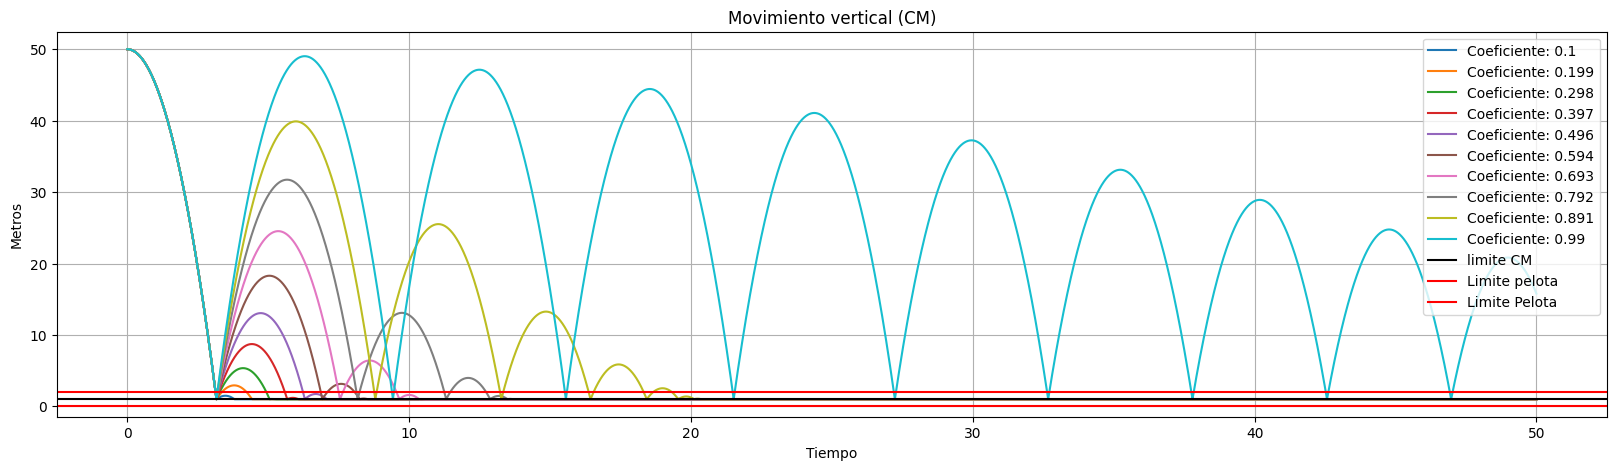

In [ ]:
plt.figure(figsize=(20,5))
for i in range(len(restitucion)):
  plt.plot(t,posicionxy(t,y0,restitucion[i],R,w0,beta,gamma)[1],label="Coeficiente: %a"%restitucion[i])
plt.title("Movimiento vertical (CM)")
plt.axhline(y=R,color="black",label="limite CM")
plt.axhline(y=2*R,color="red",label="Limite pelota")
plt.axhline(y=0,color="red",label="Limite Pelota")
plt.xlabel("Tiempo")
plt.ylabel("Metros")
plt.grid()
plt.legend()
plt.legend()

##Gráfica de la trayectoria del centro de masa

In [ ]:
w0prueba=np.linspace(-2,2,10)

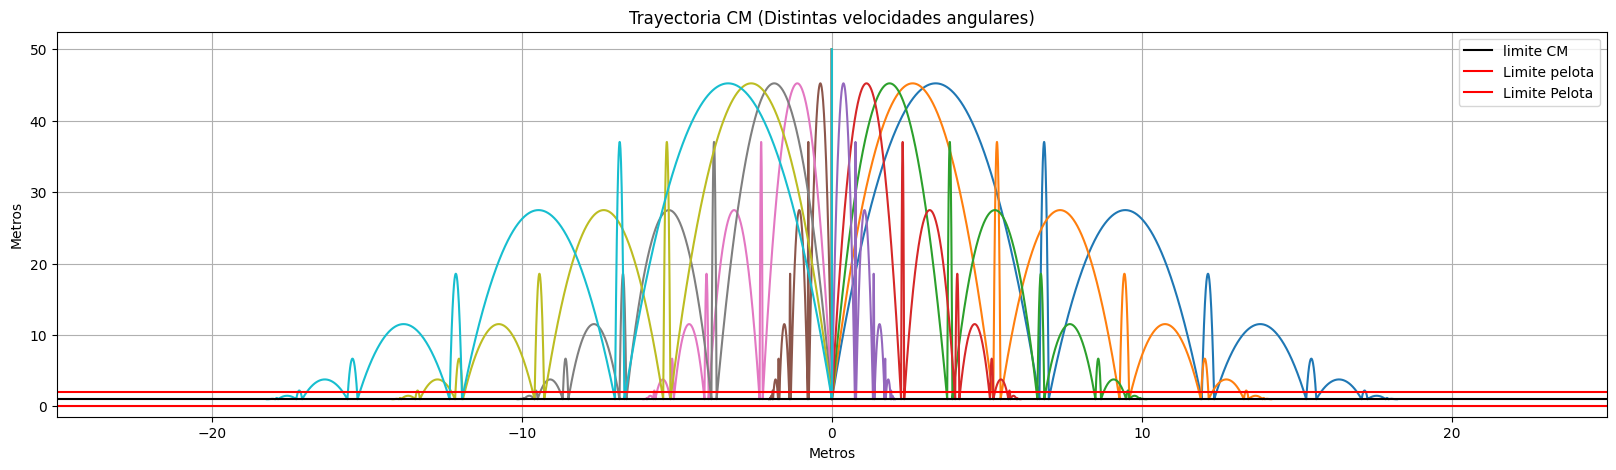

In [ ]:
plt.figure(figsize=(20,5))
for j in range(len(w0prueba)):
  plt.plot(posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[0], posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[1])

plt.title("Trayectoria CM (Distintas velocidades angulares)")
plt.axhline(y=R,color="black",label="limite CM")
plt.axhline(y=2*R,color="red",label="Limite pelota")
plt.axhline(y=0,color="red",label="Limite Pelota")
plt.xlabel("Metros")
plt.ylabel("Metros")
plt.xlim(-25,25)
plt.grid()
plt.legend()

##Gráfica de la velocidad angular con respecto al tiempo

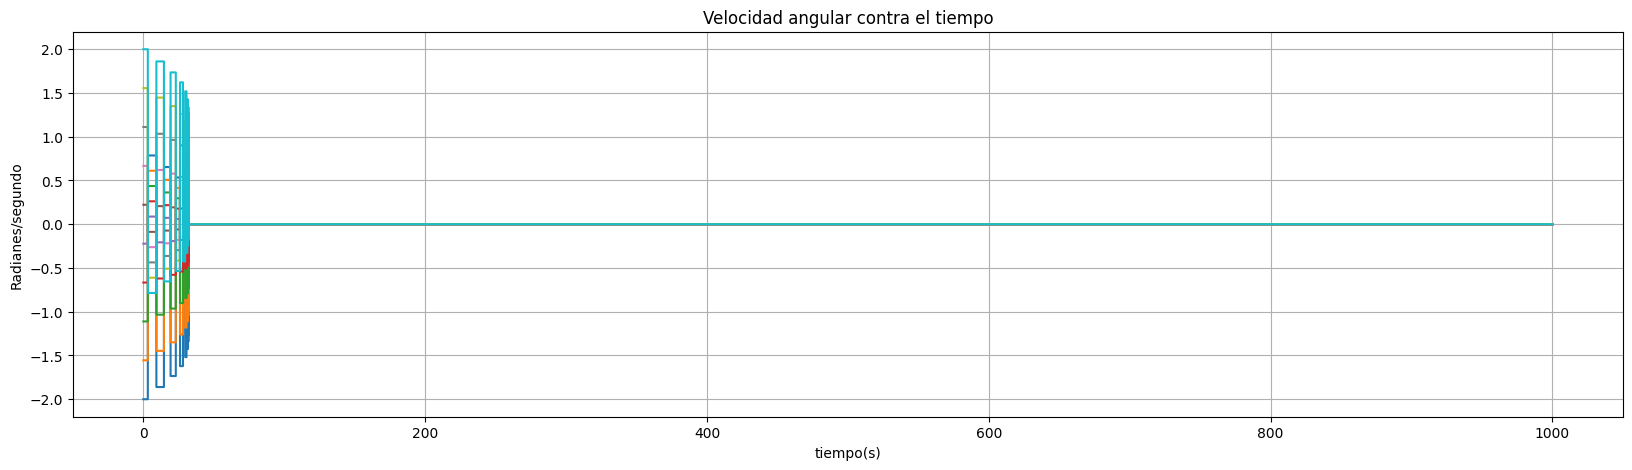

In [ ]:
plt.figure(figsize=(20,5))
for j in range(len(w0prueba)):
  plt.plot(t,posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[3])
plt.title("Velocidad angular contra el tiempo")
plt.xlabel("tiempo(s)")
plt.ylabel("Radianes/segundo")
plt.grid()

##Gráfica de la posición en x con respecto al tiempo

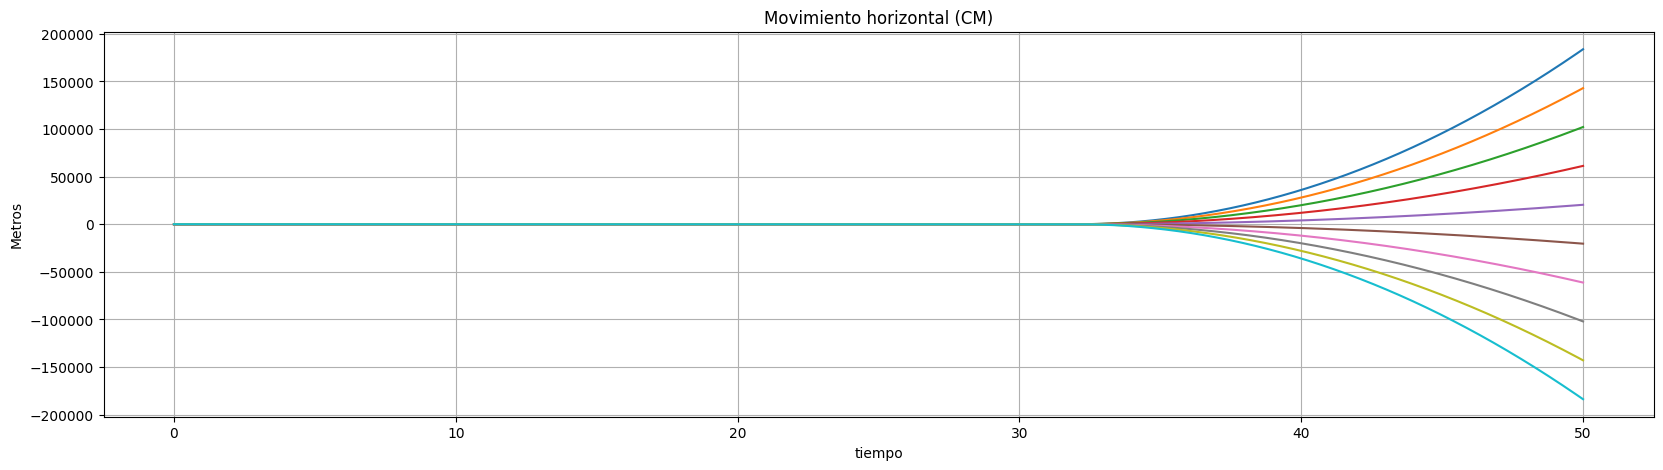

In [ ]:
plt.figure(figsize=(20,5))
for j in range(len(w0prueba)):
  plt.plot(t,posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[0])
plt.title("Movimiento horizontal (CM)")
plt.xlabel("tiempo")
plt.ylabel("Metros")
plt.grid()

##Gráfica de la velocidad con respecto al tiempo

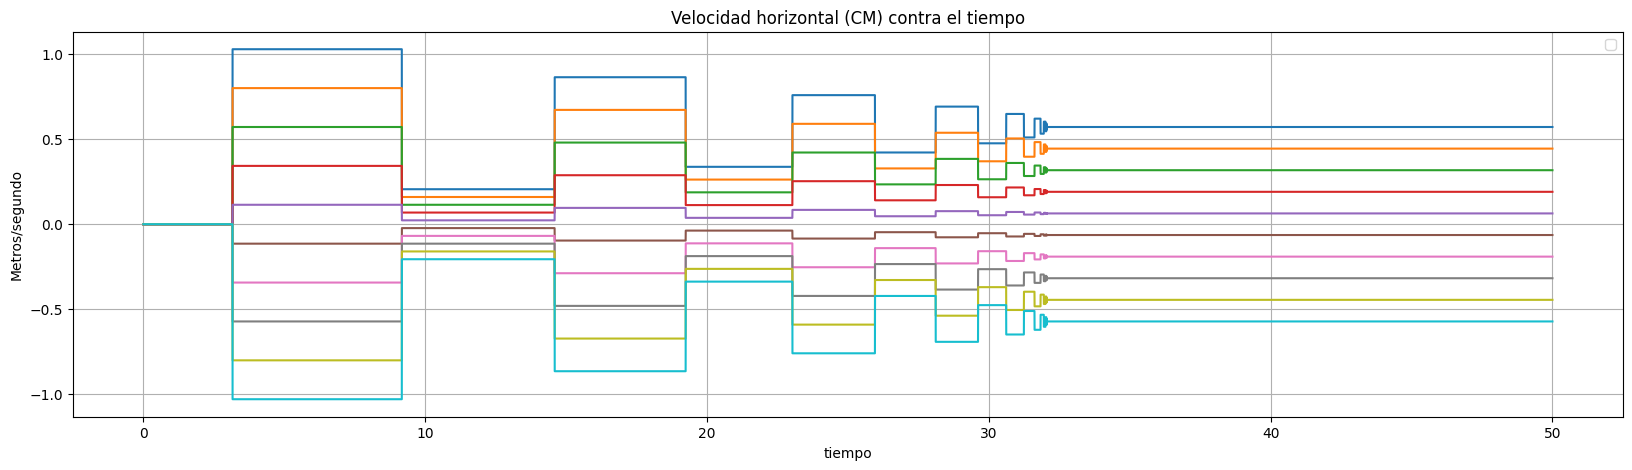

In [ ]:
plt.figure(figsize=(20,5))
for j in range(len(w0prueba)):
  plt.plot(t,posicionxy(t,y0,e,R,w0prueba[j],beta,gamma)[2])
plt.title("Velocidad horizontal (CM) contra el tiempo")
plt.xlabel("tiempo")
plt.ylabel("Metros/segundo")
plt.grid()
plt.legend()

##Animación.

In [ ]:
e=0.95
w0=-1
y0=50
R=1
beta=0.95
gamma=2/5
t1 = np.linspace(0, 30, 1000)
restitucion = 0.95
beta1=0.8
#  figura y ejes
fig, ax = plt.subplots(figsize=(15,3))

# Límites de los ejes
ax.set_xlim(-25,25)
ax.set_ylim(min(posicionxy(t1, y0, restitucion, R, w0, beta1, gamma)[1]) - 5,
            max(posicionxy(t1, y0, restitucion, R, w0, beta1, gamma)[1]) + 5)

# línea vacía para la animación
ln, = plt.plot([], [], '-')

# Etiquetas y leyenda
plt.title("Movimiento vertical (CM)")
plt.axhline(y=R, color="black", label="limite CM")
plt.axhline(y=2*R, color="red", label="Limite pelota")
plt.axhline(y=0, color="red", label="Limite Pelota")

plt.grid()
plt.legend()

# Función de inicialización
def init():
    return ln,

# Definir la función para la animación
def update(frame):
    x, y, _, _ = posicionxy(t1[:frame], y0, 0.99, R, w0, 0.95, gamma)

    # Actualizar los datos de la línea
    ln.set_data(x, y)

    return ln,

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(t1), init_func=init, blit=True)

# Mostrar la animación en el cuaderno
HTML(ani.to_jshtml())

# Referecias.
 + [Una pelota que rebota en el suelo](http://www.sc.ehu.es/sbweb/fisica3/solido/choque_suelo/choque_suelo.html)
 + [Caída de una bola que gira sobre sí misma](http://www.sc.ehu.es/sbweb/fisica3/solido/pelota_rebota/pelota_rebota.html)
 + [Animaciones](https://colab.research.google.com/drive/175OXd7JnYK26tG0-0ap4-_pZsPqyMIzX#scrollTo=Cqsvfw9Shr9p)